In [15]:
import lasio
import seaborn
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [16]:
#%% Loading DataSet

#Alaska dataSet
alaska2 = lasio.read('well_logs/dados_alaska/dado2.las').df().loc[:,['RHOB','NPHI', 'DT', 'GR', 'ILD','CALI']].dropna(subset=['RHOB','NPHI', 'DT', 'GR', 'ILD', 'CALI'])
alaska2['DEPTH'] = alaska2.index
print('Alaska 2 - Correlações')
print(alaska2.corr())
alaska3 = lasio.read('well_logs/dados_alaska/dado3.las').df().loc[:,['RHOB','NPHI', 'DT', 'GR', 'ILD', 'CALI']].dropna(subset=['RHOB','NPHI', 'DT', 'GR', 'ILD', 'CALI'])
alaska3['DEPTH'] = alaska3.index
print('Alaska 3 - Correlações')
print(alaska3.corr())
alaska4 = lasio.read('well_logs/dados_alaska/dado4.las').df().loc[:,['RHOB','NPHI', 'DT', 'GR', 'ILD']].dropna(subset=['RHOB','NPHI', 'DT', 'GR', 'ILD'])
print('Alaska 4 - Correlações')
print(alaska4.corr())
alaska5 = lasio.read('well_logs/dados_alaska/dado5.las').df().loc[:,['RHOB','NPHI', 'DT', 'GR', 'ILD', 'CALI']].dropna(subset=['RHOB','NPHI', 'DT', 'GR', 'ILD', 'CALI'])
print('Alaska 5 - Correlações')
alaska5['DEPTH'] = alaska5.index
print(alaska5.corr())



Alaska 2 - Correlações
           RHOB      NPHI        DT        GR       ILD      CALI     DEPTH
RHOB   1.000000 -0.322254 -0.250311  0.291251 -0.145727 -0.608651  0.278628
NPHI  -0.322254  1.000000  0.522223  0.503283 -0.164131  0.428572 -0.428740
DT    -0.250311  0.522223  1.000000  0.325420 -0.141120  0.095233 -0.444379
GR     0.291251  0.503283  0.325420  1.000000 -0.283312 -0.143397 -0.023131
ILD   -0.145727 -0.164131 -0.141120 -0.283312  1.000000  0.108324  0.023544
CALI  -0.608651  0.428572  0.095233 -0.143397  0.108324  1.000000 -0.223120
DEPTH  0.278628 -0.428740 -0.444379 -0.023131  0.023544 -0.223120  1.000000
Alaska 3 - Correlações
           RHOB      NPHI        DT        GR       ILD      CALI     DEPTH
RHOB   1.000000 -0.428836 -0.377076 -0.012439  0.294842 -0.514046  0.621318
NPHI  -0.428836  1.000000  0.520852  0.671720 -0.693584  0.356167 -0.502024
DT    -0.377076  0.520852  1.000000  0.377237 -0.403318  0.438731 -0.709686
GR    -0.012439  0.671720  0.377237  1.000

In [17]:
alaska2['LOF'] = 1
alaska2_lof = alaska2['LOF']
alaska2.loc[(alaska2['CALI'] > 13), 'LOF'] = -1
#alaska2.loc[(alaska2['CALI'] < 9.5), 'LOF'] = -1
alaska2.loc[(alaska2['ILD'] > 40), 'LOF'] = -1
alaska2 = alaska2.drop(alaska2[alaska2['LOF']==-1].index)
alaska2 = alaska2.drop(['LOF'], axis = 1)

In [18]:
# Corrigir rhob com caliper

X_alaska2 = np.array(alaska2.loc[:,['CALI','DT','ILD']])
rhob_alaska2 = np.array(alaska2.loc[:, ['RHOB']])
alaska2['CALI_MEAN'] = alaska2['CALI'].median()
alaska2
X_alaska2_test = np.array(alaska2.loc[:,['CALI_MEAN', 'DT', 'ILD']])

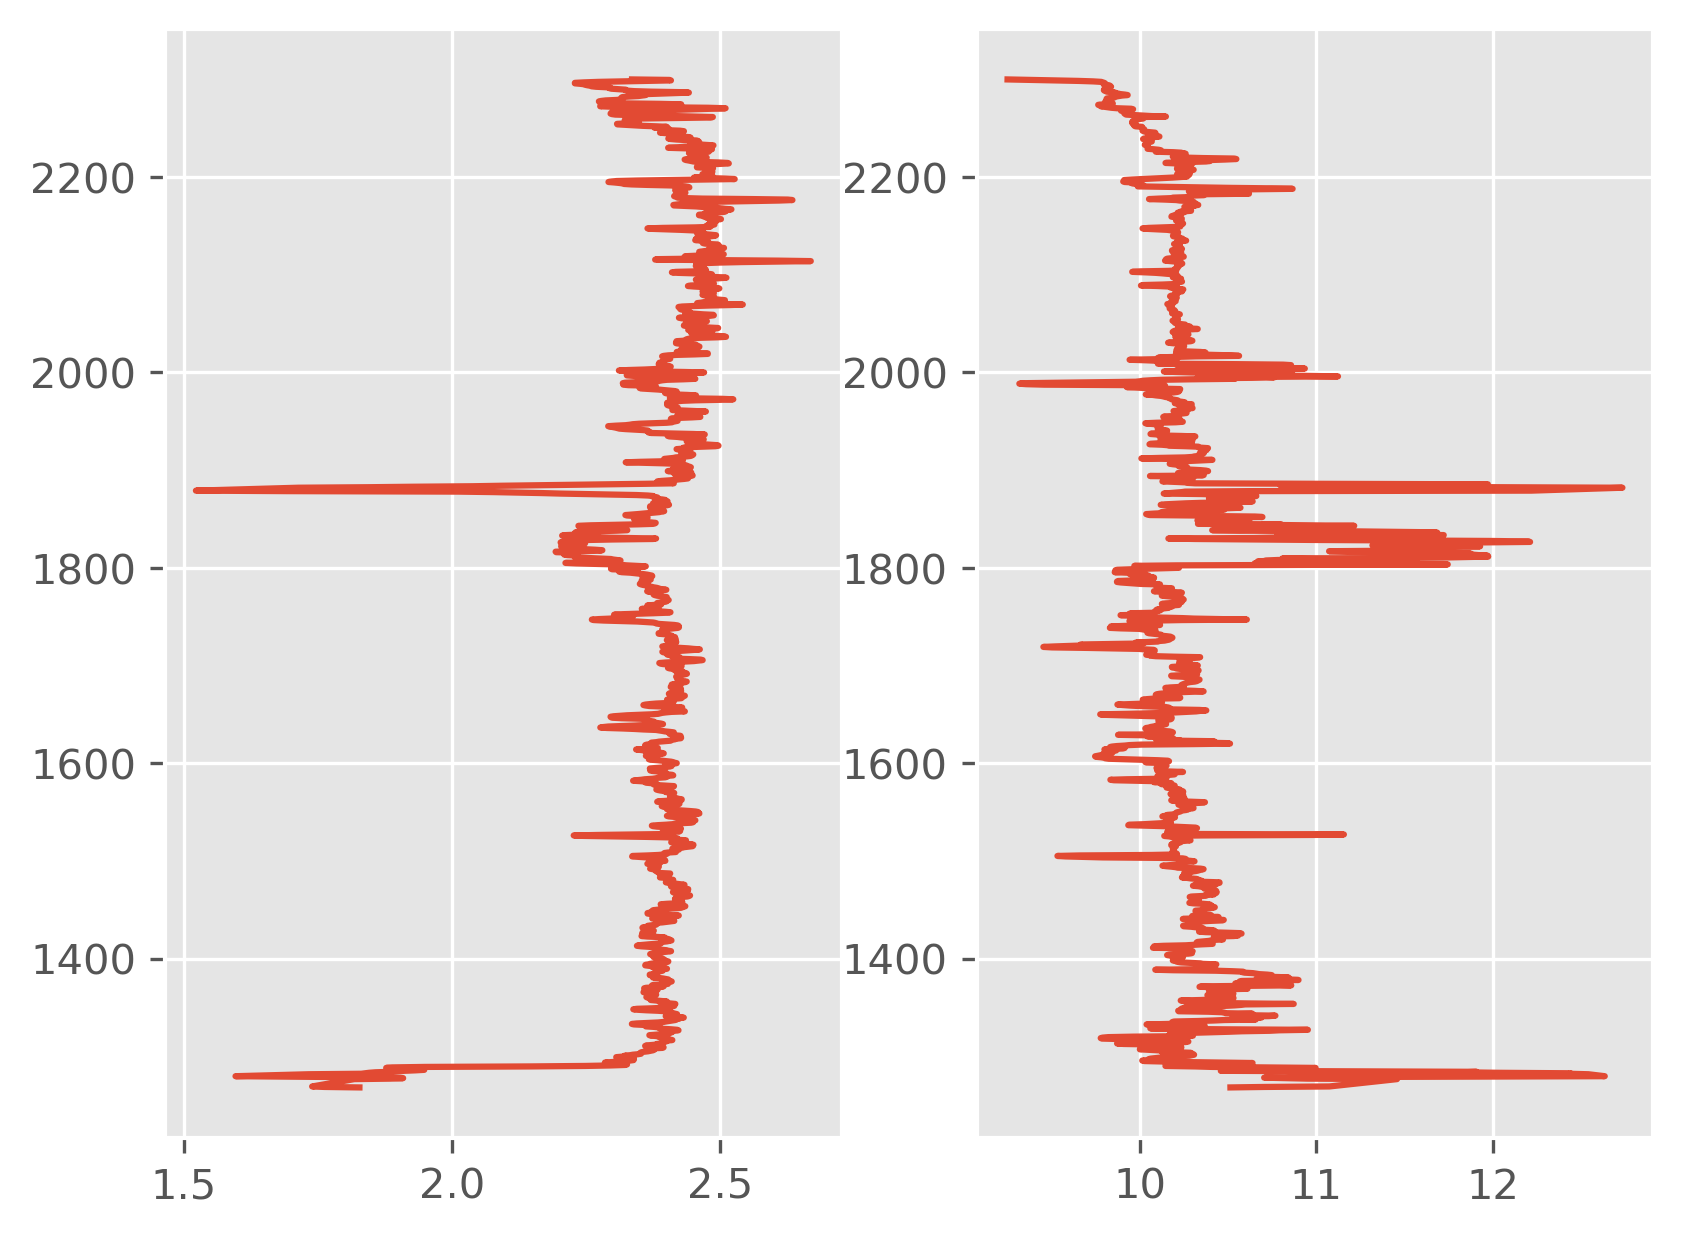

In [19]:
plt.figure(dpi=300)
plt.subplot(121)
plt.plot(alaska2['RHOB'], alaska2['DEPTH'])
plt.subplot(122)
plt.plot(alaska2['CALI'], alaska2['DEPTH'])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_alaska2_sclnd = scaler.fit_transform(X_alaska2)
X_alaska2_test_sclnd = scaler.transform(X_alaska2_test)

In [21]:
from sklearn.svm import SVR

svr_model_rhob = SVR().fit(X_alaska2_sclnd, rhob_alaska2)

rhob_alaska2_pred = svr_model_rhob.predict(X_alaska2_test_sclnd)

from sklearn.metrics import r2_score as r2

r2(rhob_alaska2, rhob_alaska2_pred)


C:\Users\Rafael Lima\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21007232682435484

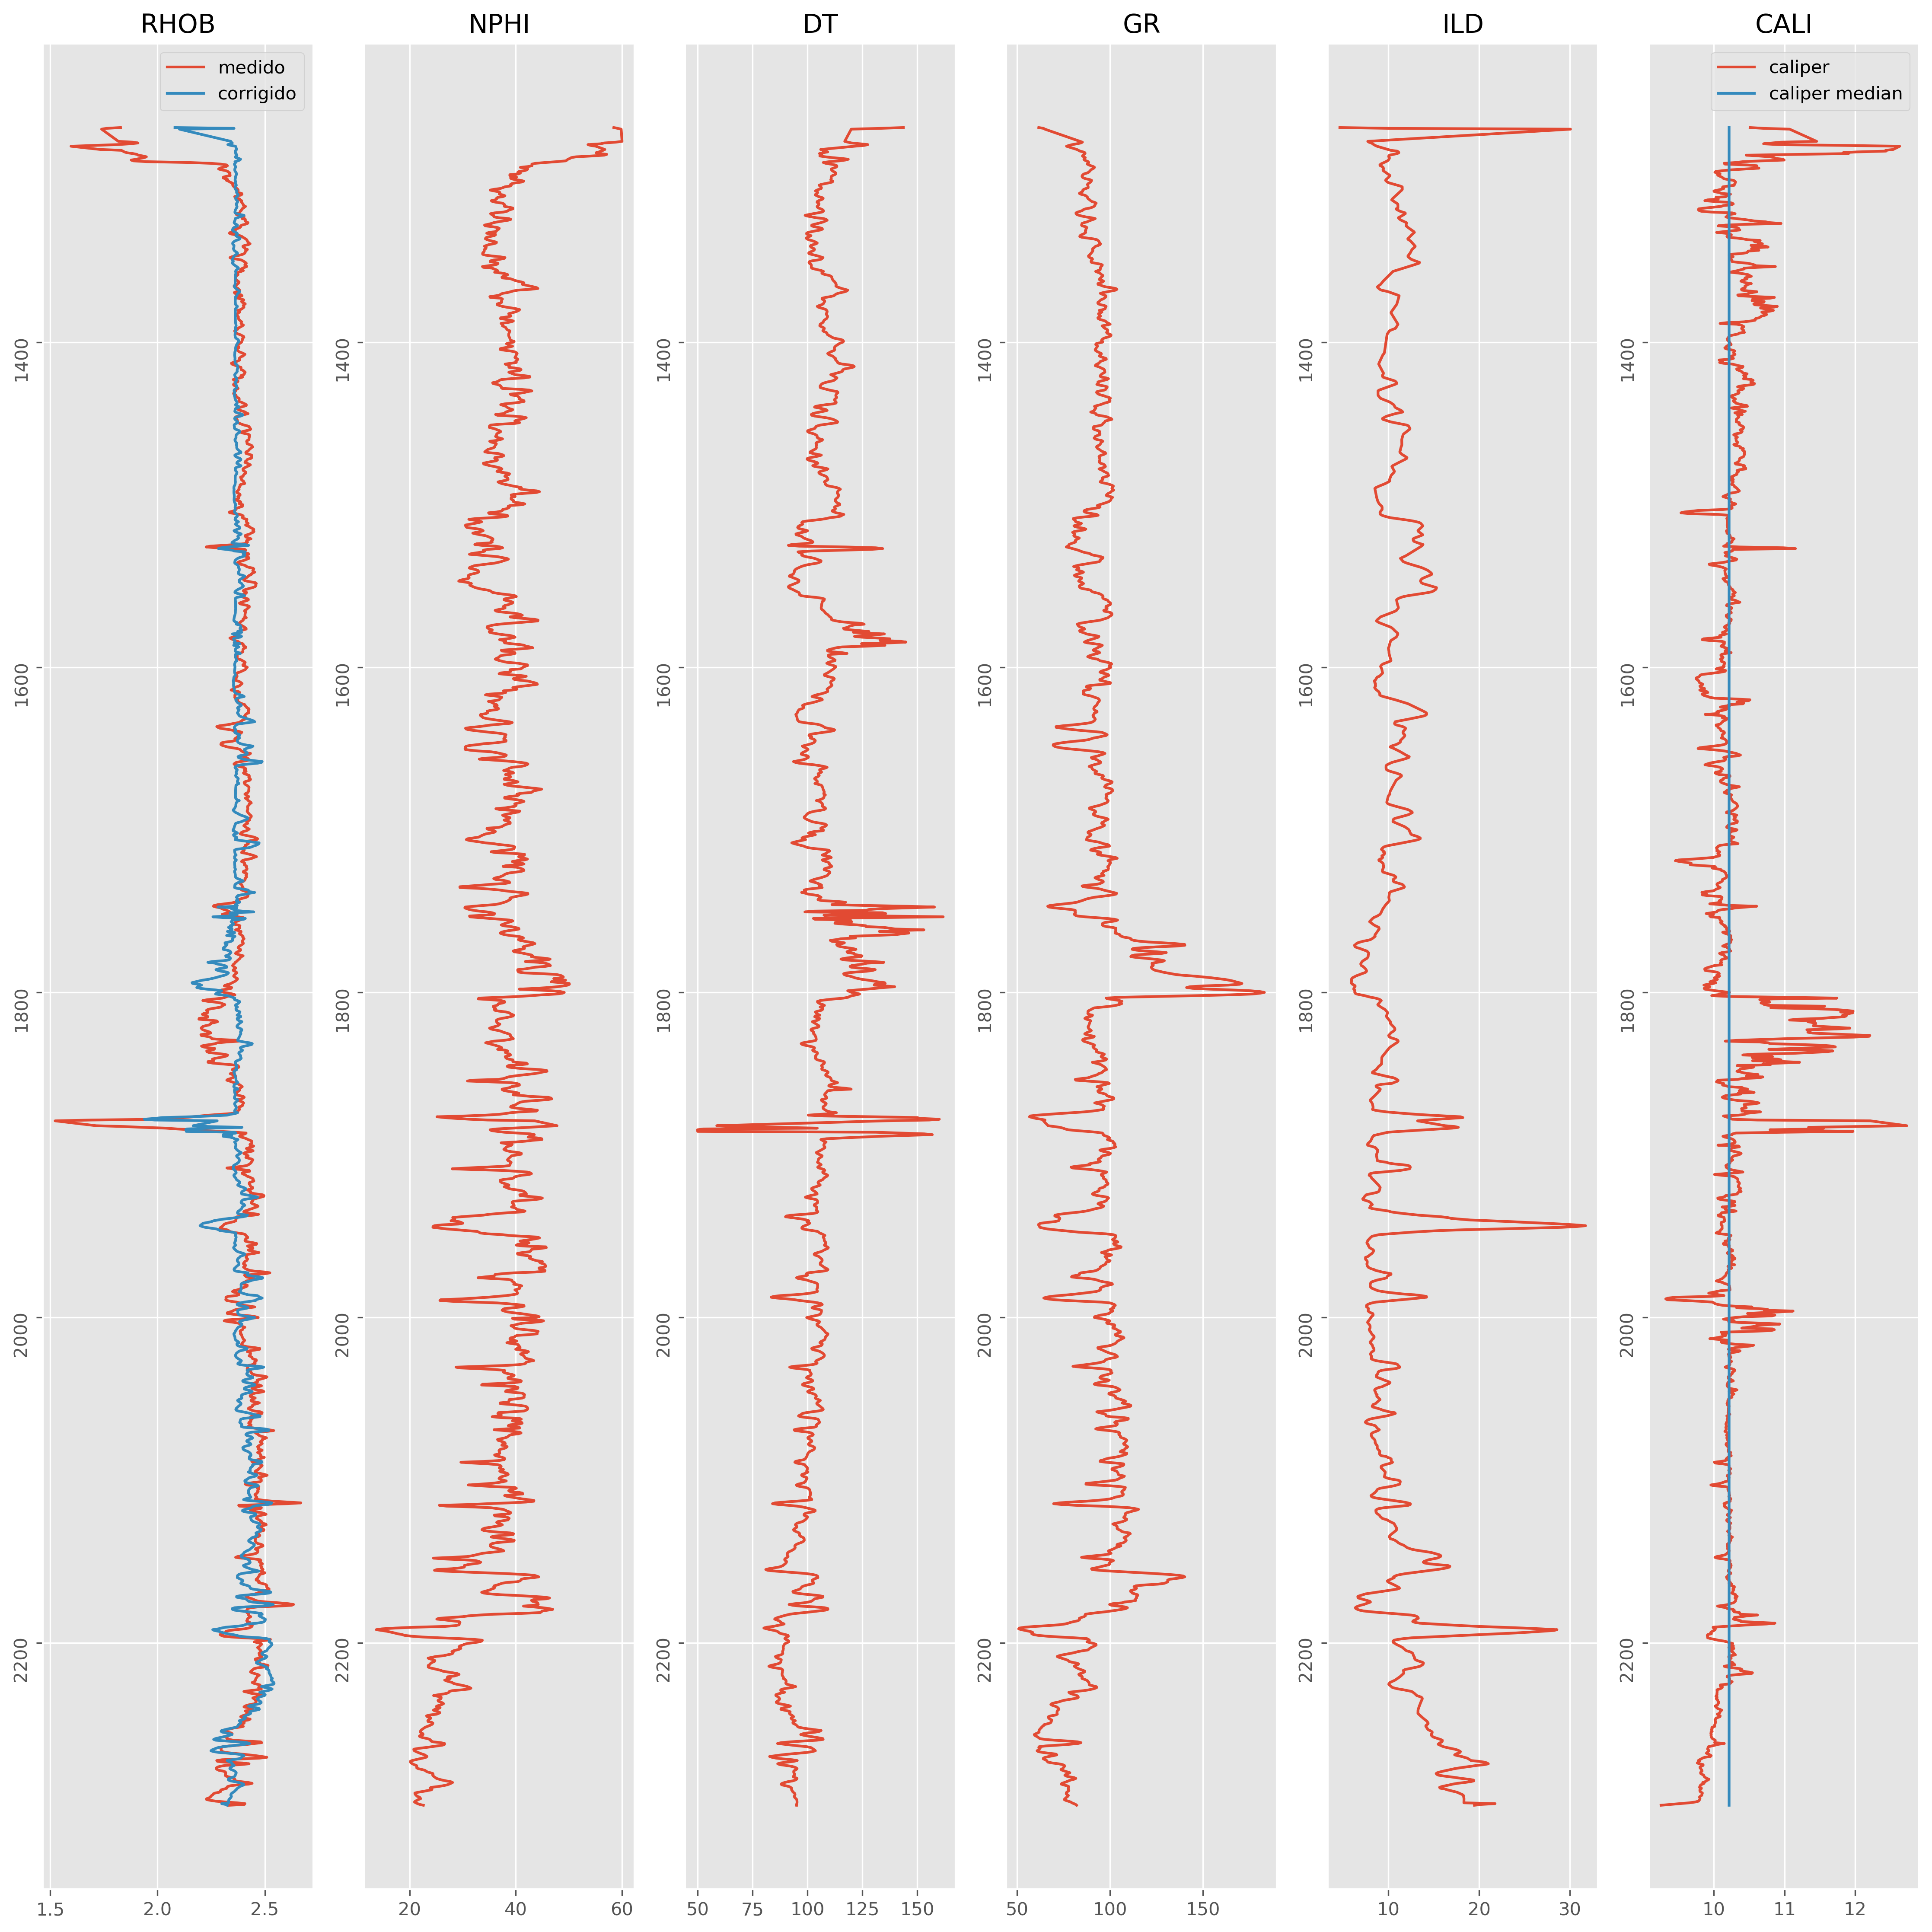

In [22]:
plt.style.use('ggplot')
plt.figure(dpi=300, figsize=[15,15])
plt.subplot(161)
plt.plot(alaska2['RHOB'], alaska2['DEPTH'],label = 'medido')
plt.plot(rhob_alaska2_pred, alaska2['DEPTH'], label = 'corrigido')
plt.gca().invert_yaxis()
#plt.xlim(2,2.5)
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('RHOB')
plt.subplot(162)
plt.plot(alaska2['NPHI'], alaska2['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('NPHI')
plt.subplot(163)
plt.plot(alaska2['DT'], alaska2['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('DT')
plt.subplot(164)
plt.plot(alaska2['GR'], alaska2['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('GR')
plt.subplot(165)
plt.plot(alaska2['ILD'], alaska2['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('ILD')
plt.subplot(166)
plt.plot(alaska2['CALI'], alaska2['DEPTH'], label = 'caliper')
plt.plot(alaska2['CALI_MEAN'], alaska2['DEPTH'], label = 'caliper median')
plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('CALI')
plt.tight_layout()         

In [23]:
alaska2['RHOB_C'] = rhob_alaska2_pred
alaska2.corr()


RHOB      NPHI        DT        GR       ILD      CALI  \
RHOB       1.000000 -0.194427 -0.276683  0.243691 -0.116593 -0.481985   
NPHI      -0.194427  1.000000  0.530062  0.610483 -0.739678  0.301604   
DT        -0.276683  0.530062  1.000000  0.350731 -0.479126  0.039953   
GR         0.243691  0.610483  0.350731  1.000000 -0.659374  0.006228   
ILD       -0.116593 -0.739678 -0.479126 -0.659374  1.000000 -0.143486   
CALI      -0.481985  0.301604  0.039953  0.006228 -0.143486  1.000000   
DEPTH      0.277812 -0.411391 -0.439747 -0.046037  0.179620 -0.208583   
CALI_MEAN       NaN       NaN       NaN       NaN       NaN       NaN   
RHOB_C     0.479357 -0.183273 -0.534342 -0.048397 -0.132438 -0.047154   

              DEPTH  CALI_MEAN    RHOB_C  
RHOB       0.277812        NaN  0.479357  
NPHI      -0.411391        NaN -0.183273  
DT        -0.439747        NaN -0.534342  
GR        -0.046037        NaN -0.048397  
ILD        0.179620        NaN -0.132438  
CALI      -0.208583        NaN -0.047154  
DEPTH      1.000000        NaN  0.340253  
CALI_MEAN       NaN        NaN       NaN  
RHOB_C     0.340253        NaN  1.000000

# Correção de densidade de alaska 3

In [24]:
alaska3.corr()

RHOB      NPHI        DT        GR       ILD      CALI     DEPTH
RHOB   1.000000 -0.428836 -0.377076 -0.012439  0.294842 -0.514046  0.621318
NPHI  -0.428836  1.000000  0.520852  0.671720 -0.693584  0.356167 -0.502024
DT    -0.377076  0.520852  1.000000  0.377237 -0.403318  0.438731 -0.709686
GR    -0.012439  0.671720  0.377237  1.000000 -0.583643  0.169709 -0.326429
ILD    0.294842 -0.693584 -0.403318 -0.583643  1.000000 -0.193475  0.304397
CALI  -0.514046  0.356167  0.438731  0.169709 -0.193475  1.000000 -0.759386
DEPTH  0.621318 -0.502024 -0.709686 -0.326429  0.304397 -0.759386  1.000000

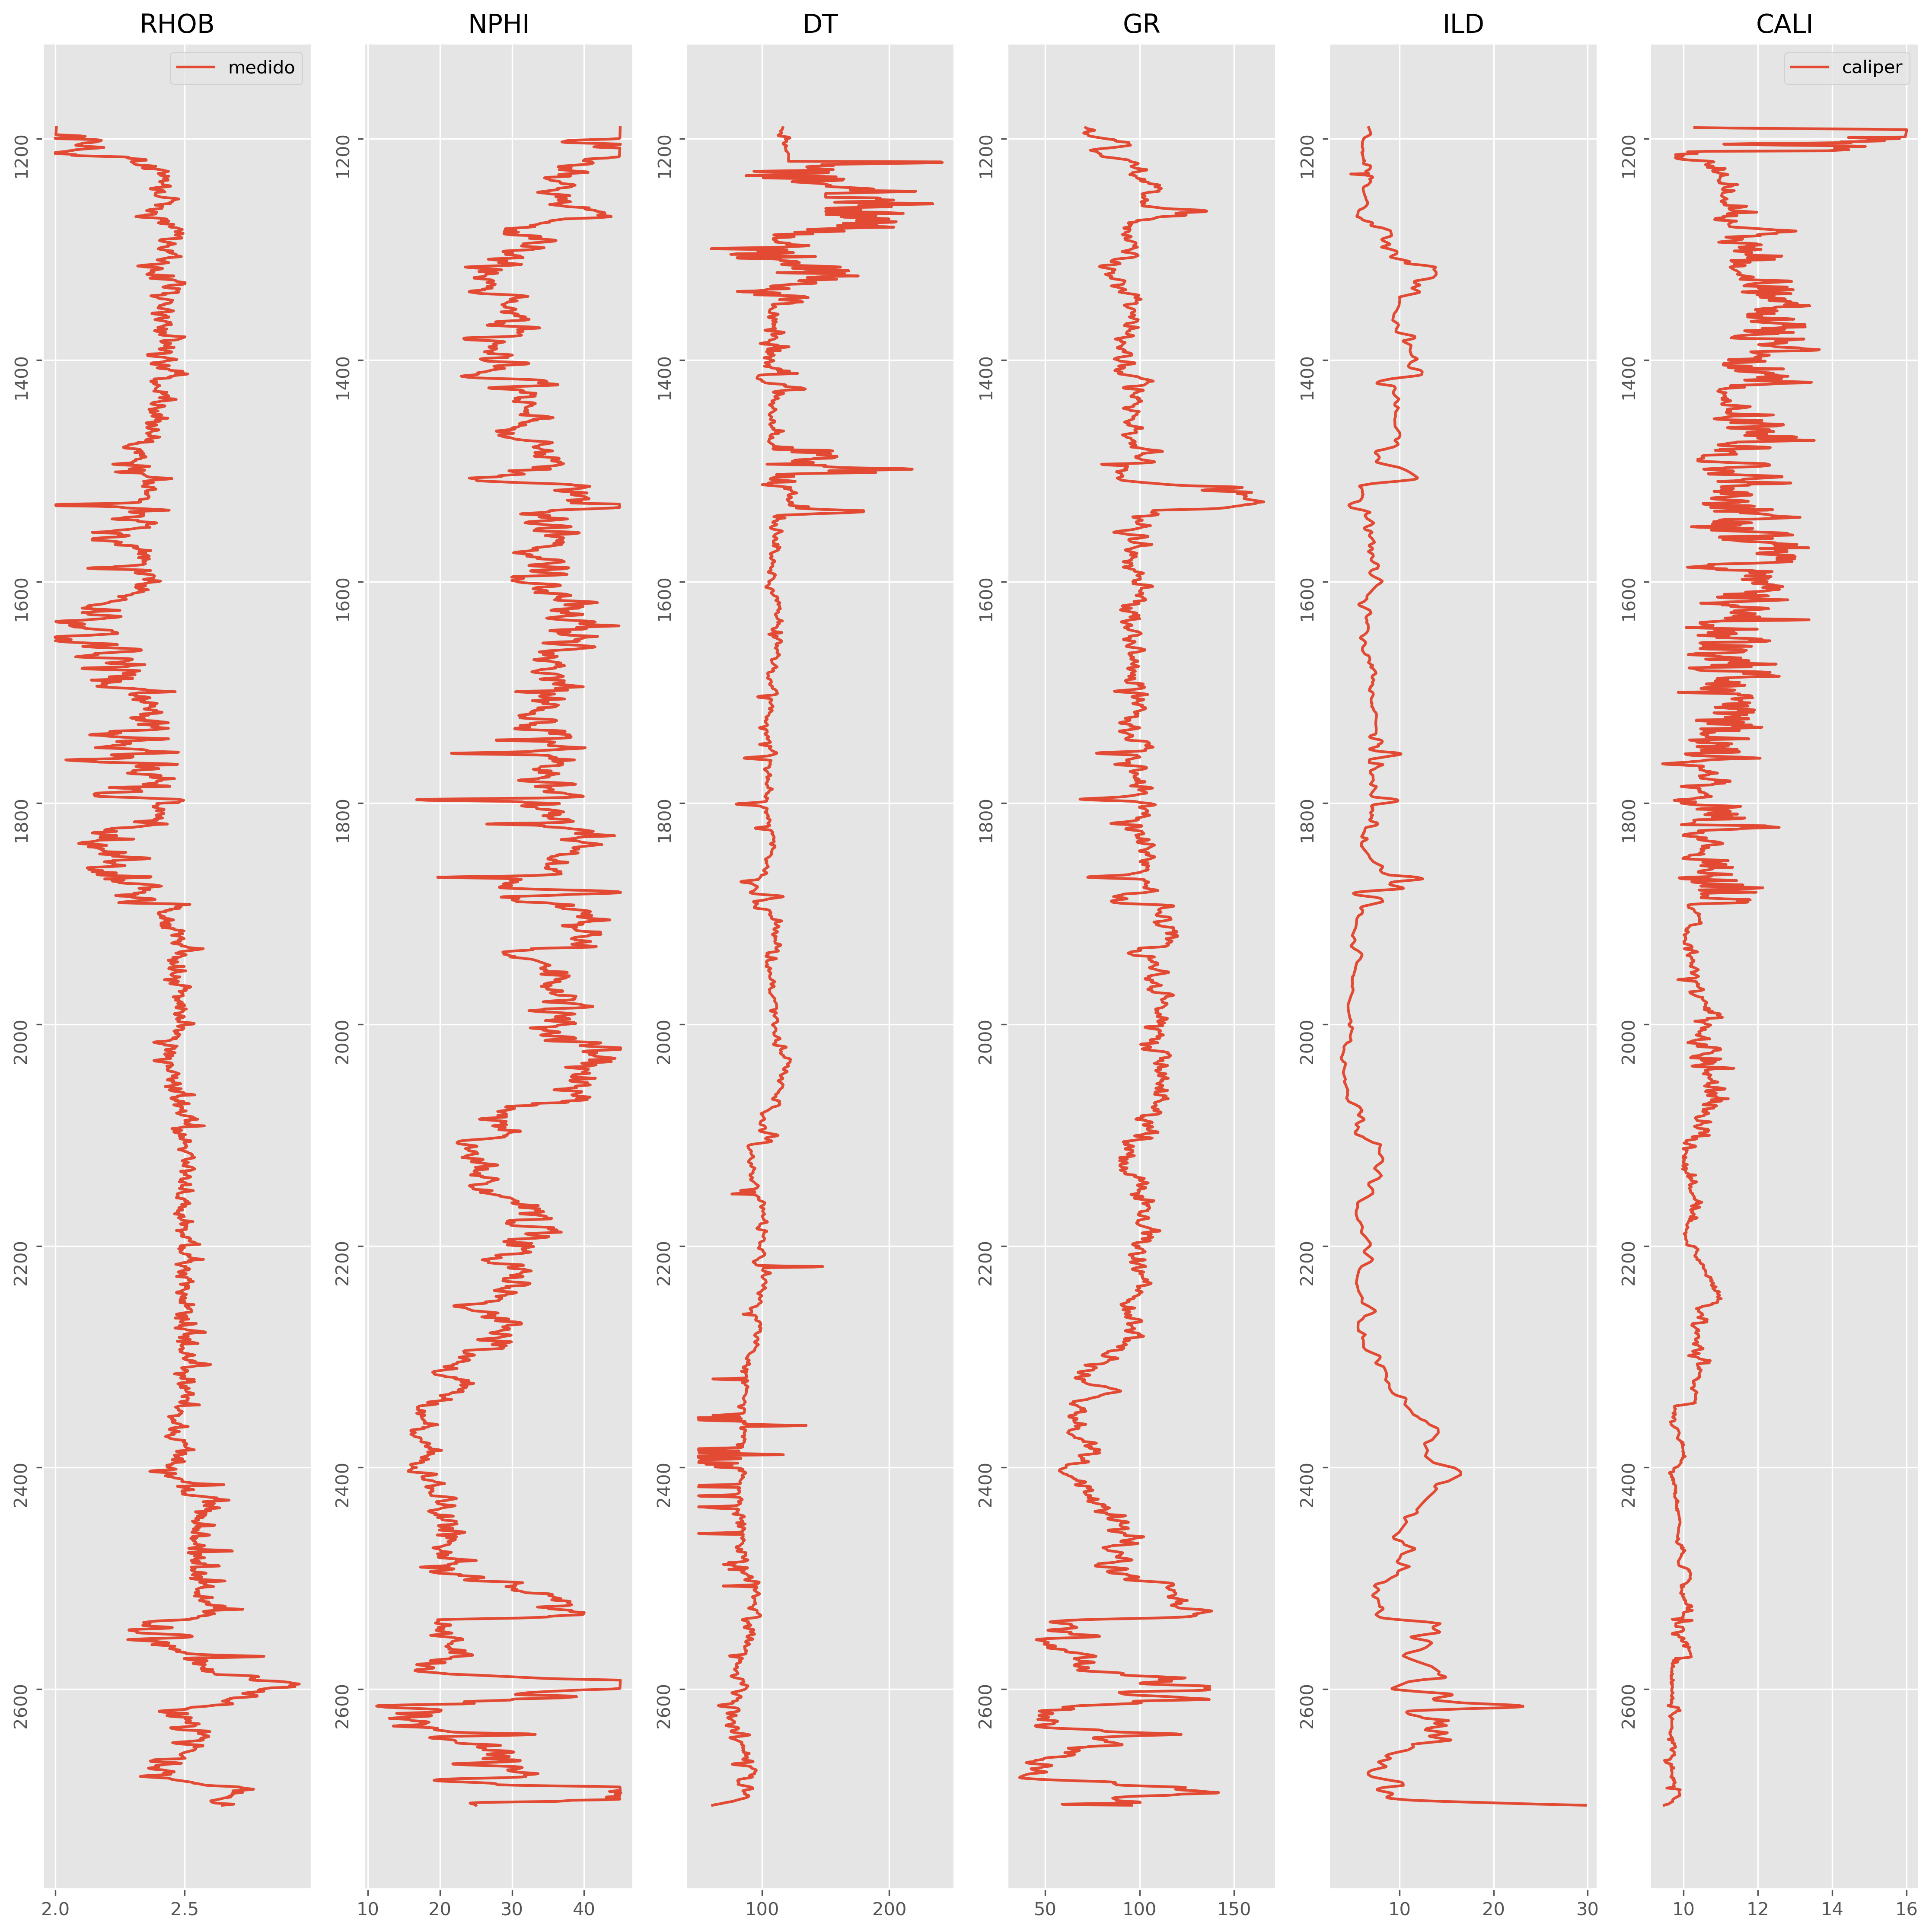

In [25]:
plt.style.use('ggplot')
plt.figure(dpi=300, figsize=[15,15])
plt.subplot(161)
plt.plot(alaska3['RHOB'], alaska3['DEPTH'],label = 'medido')
#plt.plot(rhob_alaska3_pred, alaska3['DEPTH'], label = 'corrigido')
plt.gca().invert_yaxis()
#plt.xlim(2,2.5)
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('RHOB')
plt.subplot(162)
plt.plot(alaska3['NPHI'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('NPHI')
plt.subplot(163)
plt.plot(alaska3['DT'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('DT')
plt.subplot(164)
plt.plot(alaska3['GR'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('GR')
plt.subplot(165)
plt.plot(alaska3['ILD'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('ILD')
plt.subplot(166)
plt.plot(alaska3['CALI'], alaska3['DEPTH'], label = 'caliper')
#plt.plot(alaska3['CALI_MEAN'], alaska3['DEPTH'], label = 'caliper median')
plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('CALI')
plt.tight_layout()  

In [35]:
# Corrigir rhob com caliper

X_alaska3 = np.array(alaska3.loc[:,['CALI','GR']])
rhob_alaska3 = np.array(alaska3.loc[:, ['RHOB']])
alaska3['CALI_MEAN'] = alaska3['CALI'].median()
alaska3.loc[(alaska3['DEPTH'] < 1900), 'CALI_MEAN'] = alaska3.loc[(alaska3['DEPTH'] < 1900), 'CALI'].median()
alaska3.loc[(alaska3['DEPTH'] >= 1900), 'CALI_MEAN'] = alaska3.loc[(alaska3['DEPTH'] >= 1900), 'CALI'].median()
X_alaska3_test = np.array(alaska3.loc[:,['CALI_MEAN', 'GR']])

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_alaska3_sclnd = scaler.fit_transform(X_alaska3)
X_alaska3_test_sclnd = scaler.transform(X_alaska3_test)

In [37]:
from sklearn.svm import SVR

svr_model_rhob = SVR().fit(X_alaska3_sclnd, rhob_alaska3)

rhob_alaska3_pred = svr_model_rhob.predict(X_alaska3_test_sclnd)

from sklearn.metrics import r2_score as r2

r2(rhob_alaska3, rhob_alaska3_pred)


C:\Users\Rafael Lima\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4803446526984343

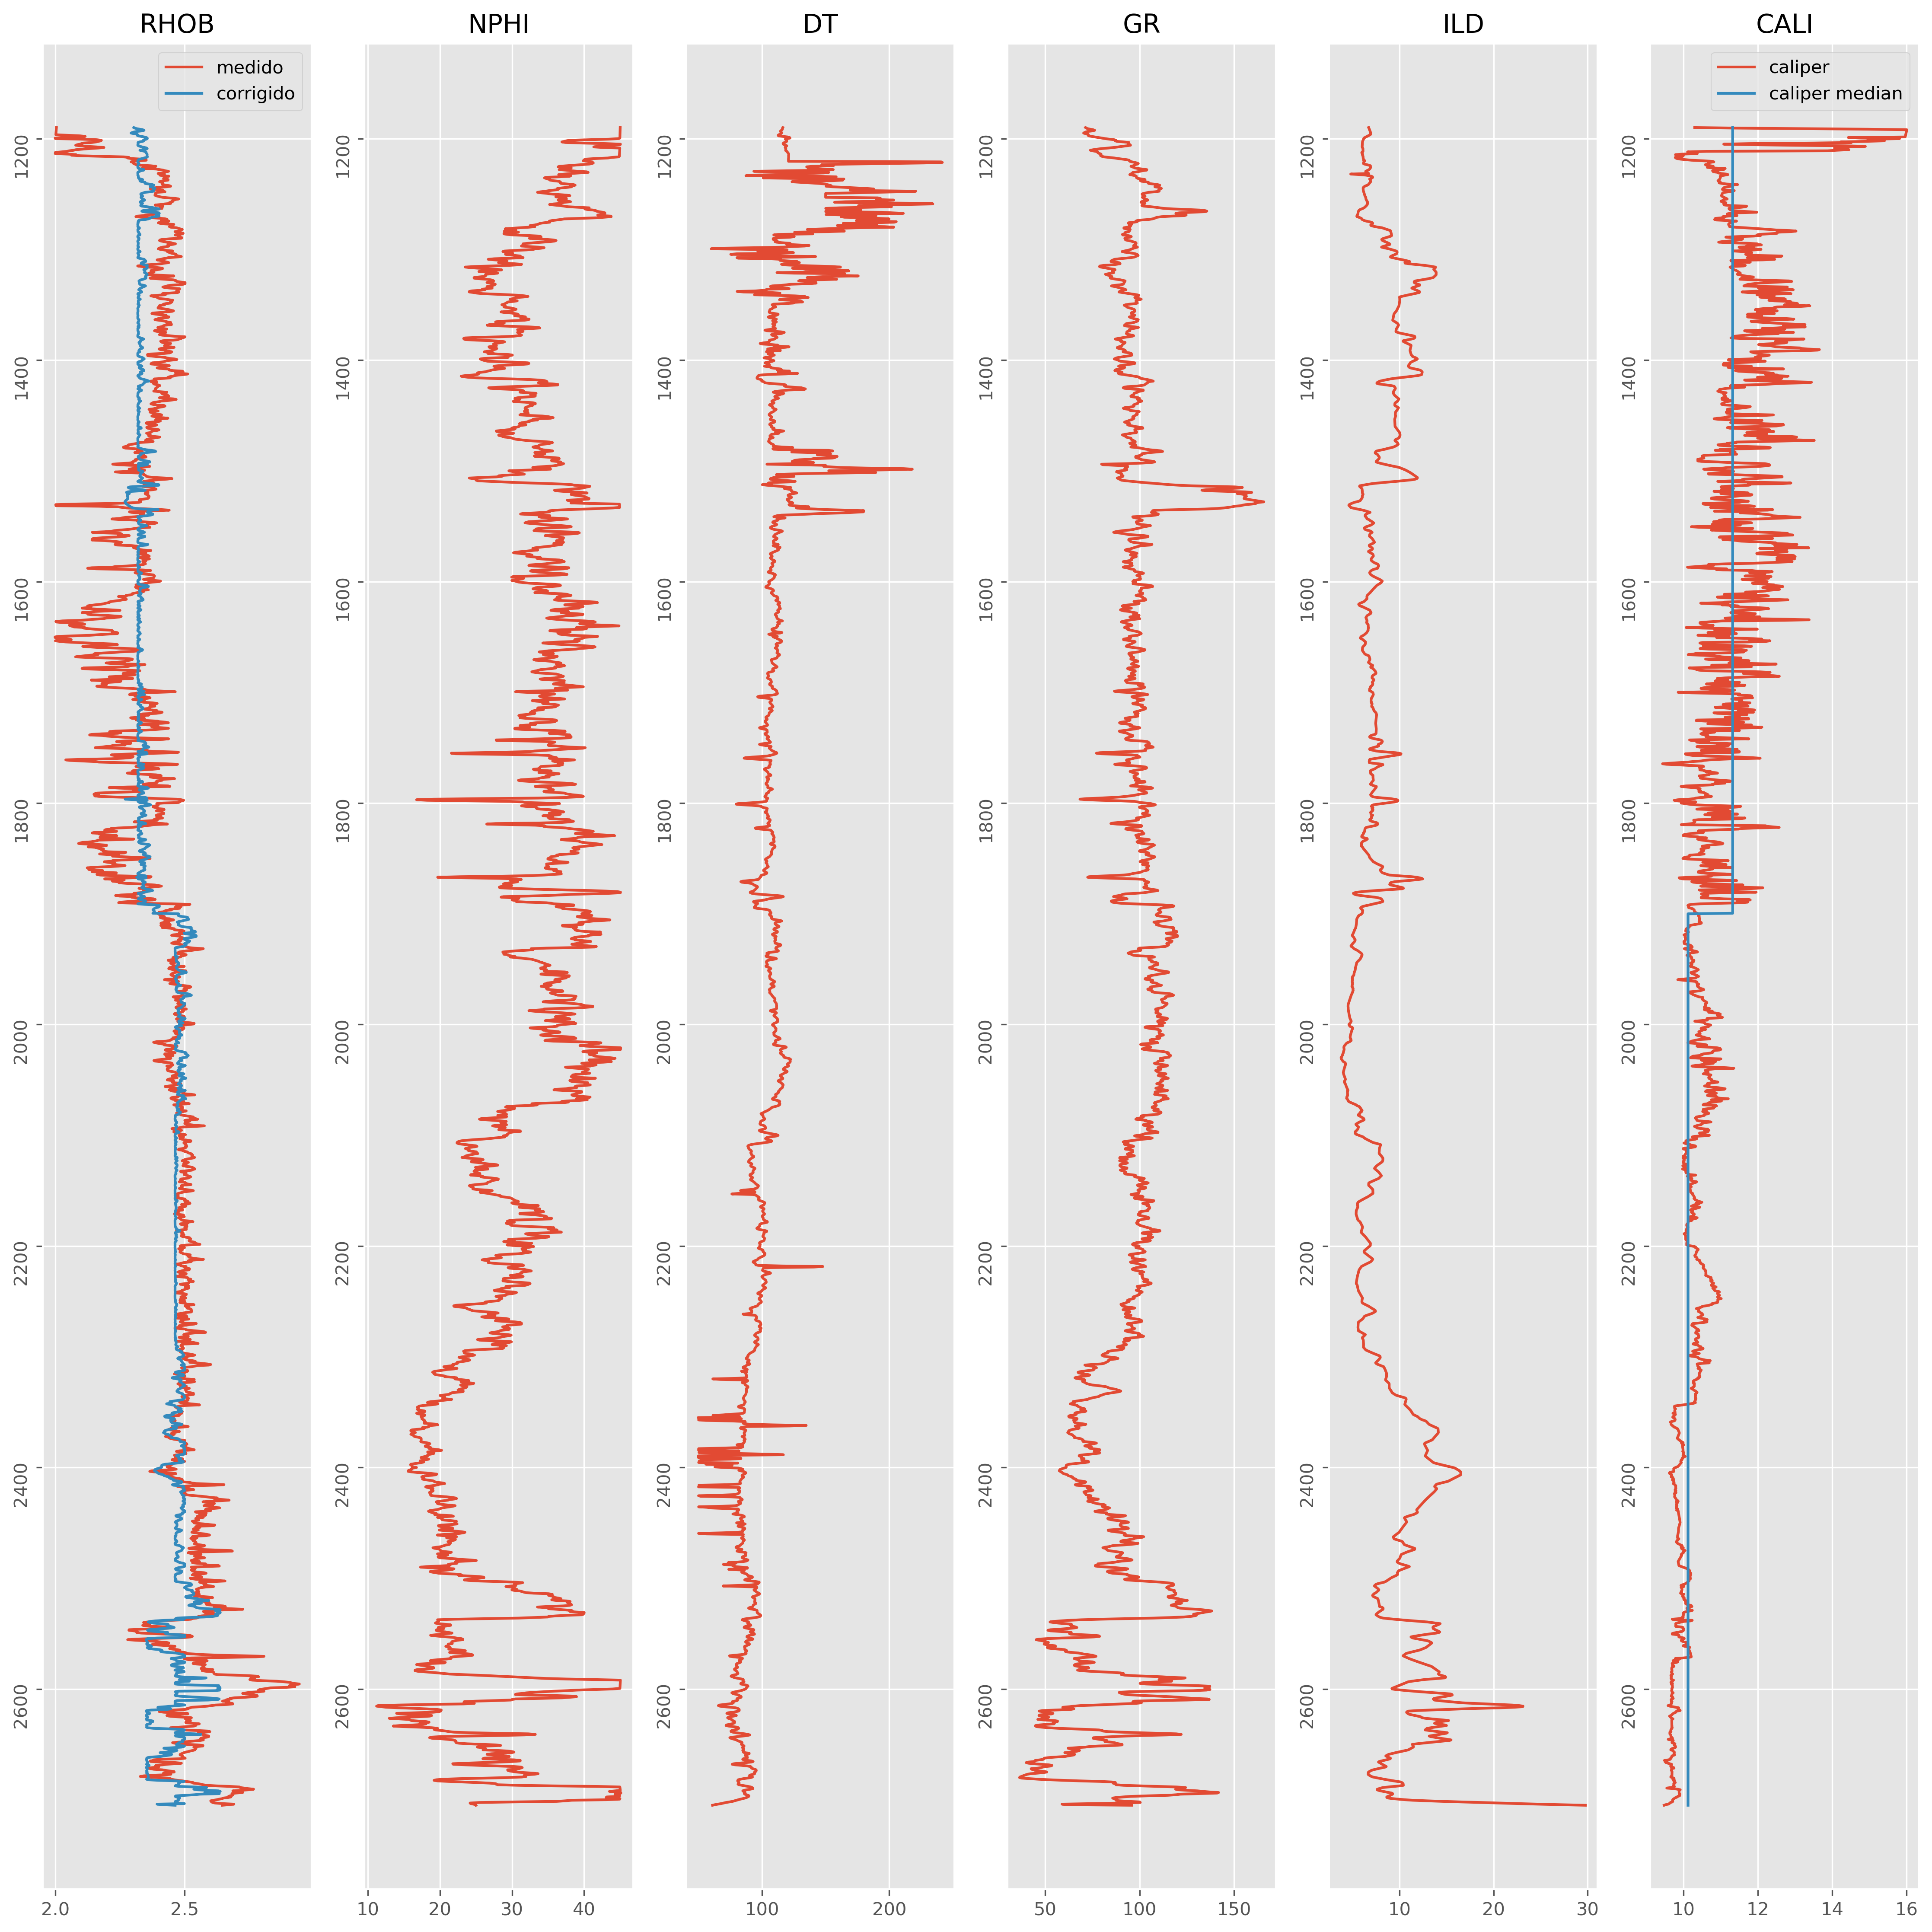

In [38]:
plt.style.use('ggplot')
plt.figure(dpi=300, figsize=[15,15])
plt.subplot(161)
plt.plot(alaska3['RHOB'], alaska3['DEPTH'],label = 'medido')
plt.plot(rhob_alaska3_pred, alaska3['DEPTH'], label = 'corrigido')
plt.gca().invert_yaxis()
#plt.xlim(2,2.5)
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('RHOB')
plt.subplot(162)
plt.plot(alaska3['NPHI'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('NPHI')
plt.subplot(163)
plt.plot(alaska3['DT'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('DT')
plt.subplot(164)
plt.plot(alaska3['GR'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('GR')
plt.subplot(165)
plt.plot(alaska3['ILD'], alaska3['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('ILD')
plt.subplot(166)
plt.plot(alaska3['CALI'], alaska3['DEPTH'], label = 'caliper')
plt.plot(alaska3['CALI_MEAN'], alaska3['DEPTH'], label = 'caliper median')
plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('CALI')
plt.tight_layout()         

In [39]:
alaska3['RHOB_C'] = rhob_alaska3_pred
alaska3.corr()

RHOB      NPHI        DT        GR       ILD      CALI  \
RHOB       1.000000 -0.428836 -0.377076 -0.012439  0.294842 -0.514046   
NPHI      -0.428836  1.000000  0.520852  0.671720 -0.693584  0.356167   
DT        -0.377076  0.520852  1.000000  0.377237 -0.403318  0.438731   
GR        -0.012439  0.671720  0.377237  1.000000 -0.583643  0.169709   
ILD        0.294842 -0.693584 -0.403318 -0.583643  1.000000 -0.193475   
CALI      -0.514046  0.356167  0.438731  0.169709 -0.193475  1.000000   
DEPTH      0.621318 -0.502024 -0.709686 -0.326429  0.304397 -0.759386   
CALI_MEAN -0.696927  0.429123  0.533315  0.192411 -0.102832  0.676945   
RHOB_C     0.720391 -0.250158 -0.430304  0.070879  0.017798 -0.606176   

              DEPTH  CALI_MEAN    RHOB_C  
RHOB       0.621318  -0.696927  0.720391  
NPHI      -0.502024   0.429123 -0.250158  
DT        -0.709686   0.533315 -0.430304  
GR        -0.326429   0.192411  0.070879  
ILD        0.304397  -0.102832  0.017798  
CALI      -0.759386   0.676945 -0.606176  
DEPTH      1.000000  -0.864304  0.753030  
CALI_MEAN -0.864304   1.000000 -0.899459  
RHOB_C     0.753030  -0.899459  1.000000

# Correção de alaska 5

In [ ]:
alaska5.corr()

In [ ]:
plt.style.use('ggplot')
plt.figure(dpi=300, figsize=[15,15])
plt.subplot(161)
plt.plot(alaska5['RHOB'], alaska5['DEPTH'],label = 'medido')
#plt.plot(rhob_alaska3_pred, alaska3['DEPTH'], label = 'corrigido')
plt.gca().invert_yaxis()
#plt.xlim(2,2.5)
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('RHOB')
plt.subplot(162)
plt.plot(alaska5['NPHI'], alaska5['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('NPHI')
plt.subplot(163)
plt.plot(alaska5['DT'], alaska5['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('DT')
plt.subplot(164)
plt.plot(alaska5['GR'], alaska5['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('GR')
plt.subplot(165)
plt.plot(alaska5['ILD'], alaska5['DEPTH'])
plt.gca().invert_yaxis()
plt.yticks(rotation=90)
plt.title('ILD')
plt.subplot(166)
plt.plot(alaska5['CALI'], alaska5['DEPTH'], label = 'caliper')
#plt.plot(alaska3['CALI_MEAN'], alaska3['DEPTH'], label = 'caliper median')
plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.yticks(rotation=90)
plt.title('CALI')
plt.tight_layout() 

# Analise do caliper

In [ ]:
seaborn.pairplot(alaska2.loc[:,['RHOB', 'CALI']])
alaska2['LOF'] = 1
alaska2_lof = alaska2['LOF']
alaska2.loc[(alaska2['CALI'] > 10.4) | (alaska2['CALI'] < 10), 'LOF'] = -1
#alaska2.loc[(alaska2['RHOB'] < 2.15) | (alaska2['RHOB'] > 2.55), 'LOF'] = -1
#alaska2.loc[(alaska2['ILD'] > 25), 'LOF'] = -1
#alaska2.loc[(alaska2['GR'] > 125), 'LOF'] = -1
#alaska2.loc[(alaska2['DT'] > 125), 'LOF'] = -1
seaborn.pairplot(alaska2, hue='LOF', palette='Dark2')

alaska2_lof = alaska2['LOF']
plt.figure(dpi=300, figsize=[20,20])
plt.subplot(161)
plt.scatter(alaska2['RHOB'], alaska2.index, c=alaska2_lof)
plt.subplot(162)
plt.scatter(alaska2['NPHI'], alaska2.index, c=alaska2_lof)
plt.subplot(163)
plt.scatter(alaska2['DT'], alaska2.index, c=alaska2_lof)
plt.subplot(164)
plt.scatter(alaska2['GR'], alaska2.index, c=alaska2_lof)
plt.subplot(165)
plt.scatter(alaska2['ILD'], alaska2.index, c=alaska2_lof)
plt.xlim(0,40)
plt.subplot(166)
plt.scatter(alaska2['CALI'], alaska2.index, c=alaska2_lof)

In [ ]:
alaska2 = alaska2.drop(alaska2[alaska2['LOF']==-1].index)
alaska2 = alaska2.drop(['LOF'], axis = 1)
seaborn.pairplot(alaska2, palette='Dark2')

In [ ]:
alaska2.corr()

In [ ]:
plt.figure(dpi=300, figsize=[20,20])
plt.subplot(161)
plt.scatter(alaska2['RHOB'], alaska2.index)
plt.subplot(162)
plt.scatter(alaska2['NPHI'], alaska2.index)
plt.subplot(163)
plt.scatter(alaska2['DT'], alaska2.index)
plt.subplot(164)
plt.scatter(alaska2['GR'], alaska2.index)
plt.subplot(165)
plt.scatter(alaska2['ILD'], alaska2.index)
plt.xlim(0,40)
plt.subplot(166)
plt.scatter(alaska2['CALI'], alaska2.index)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=40)

#### Alaska2
alaska2_lof = lof.fit_predict(alaska2)
alaska2['LOF'] = alaska2_lof
seaborn.pairplot(alaska2.loc[:,['RHOB', hue='LOF', palette='Dark2').fig.suptitle("Alaska 2 - LOF", y=1.05, fontsize=20)

plt.figure(dpi=300, figsize=[20,20])
plt.subplot(161)
plt.scatter(alaska2['RHOB'], alaska2.index, c=alaska2_lof)
plt.subplot(162)
plt.scatter(alaska2['NPHI'], alaska2.index, c=alaska2_lof)
plt.subplot(163)
plt.scatter(alaska2['DT'], alaska2.index, c=alaska2_lof)
plt.subplot(164)
plt.scatter(alaska2['GR'], alaska2.index, c=alaska2_lof)
plt.subplot(165)
plt.scatter(alaska2['ILD'], alaska2.index, c=alaska2_lof)
plt.xlim(0,40)
plt.subplot(166)
plt.scatter(alaska2['CALI'], alaska2.index, c=alaska2_lof)


In [ ]:
# Dropar outliers Alaska2
alaska2 = alaska2.drop(alaska2[alaska2['LOF']==-1].index)
alaska2 = alaska2.drop(['LOF'], axis = 1)
print('Correlações após o LOF aplicado')
print(alaska2.corr())
seaborn.pairplot(alaska2, palette='Dark2')

In [ ]:
#### Alaska3
lof = LocalOutlierFactor(n_neighbors=20)

alaska3_lof = lof.fit_predict(alaska3)
alaska3['LOF'] = alaska3_lof
seaborn.pairplot(alaska3, hue='LOF', palette='Dark2').fig.suptitle("Alaska 3 - LOF", y=1.05, fontsize=20)

plt.figure(dpi=300, figsize=[20,20])
plt.subplot(151)
plt.scatter(alaska3['RHOB'], alaska3.index, c=alaska3_lof)
plt.subplot(152)
plt.scatter(alaska3['NPHI'], alaska3.index, c=alaska3_lof)
plt.subplot(153)
plt.scatter(alaska3['DT'], alaska3.index, c=alaska3_lof)
plt.subplot(154)
plt.scatter(alaska3['GR'], alaska3.index, c=alaska3_lof)
plt.subplot(155)
plt.scatter(alaska3['ILD'], alaska3.index, c=alaska3_lof)
plt.xlim(0,40)



In [ ]:
# Dropa alaska 3 com lof
alaska3 = alaska3.drop(alaska3[alaska3['LOF']==-1].index)
alaska3 = alaska3.drop(['LOF'], axis = 1)
alaska3.corr()
seaborn.pairplot(alaska3, palette='Dark2')

In [ ]:
alaska3.corr()

In [ ]:
#### Alaska5
alaska5_lof = lof.fit_predict(alaska5.iloc[:,1:])
alaska5['LOF'] = alaska5_lof
seaborn.pairplot(alaska5, hue='LOF', palette='Dark2').fig.suptitle("Alaska 2 - Covariance", y=1.05, fontsize=20)

plt.figure(dpi=300, figsize=[20,20])
plt.subplot(151)
plt.scatter(alaska5['RHOB'], alaska5.index, c=alaska5_lof)
plt.subplot(152)
plt.scatter(alaska5['NPHI'], alaska5.index, c=alaska5_lof)
plt.subplot(153)
plt.scatter(alaska5['DT'], alaska5.index, c=alaska5_lof)
plt.subplot(154)
plt.scatter(alaska5['GR'], alaska5.index, c=alaska5_lof)
plt.subplot(155)
plt.scatter(alaska5['ILD'], alaska5.index, c=alaska5_lof)
plt.xlim(0,40)

In [ ]:
#drop alaska 5 com lof
alaska5 = alaska5.drop(alaska5[alaska5['LOF']==-1].index)
alaska5 = alaska5.drop(['LOF'], axis = 1)
print(alaska5.corr())
seaborn.pairplot(alaska5, palette='Dark2') 

# Concatenate data

In [40]:
alaska_concat = pd.concat([alaska2,alaska3])

In [41]:
alaska_concat.corr()

RHOB      NPHI        DT        GR       ILD      CALI  \
RHOB       1.000000 -0.194427 -0.276683  0.243691 -0.116593 -0.481985   
NPHI      -0.194427  1.000000  0.530062  0.610483 -0.739678  0.301604   
DT        -0.276683  0.530062  1.000000  0.350731 -0.479126  0.039953   
GR         0.243691  0.610483  0.350731  1.000000 -0.659374  0.006228   
ILD       -0.116593 -0.739678 -0.479126 -0.659374  1.000000 -0.143486   
CALI      -0.481985  0.301604  0.039953  0.006228 -0.143486  1.000000   
DEPTH      0.277812 -0.411391 -0.439747 -0.046037  0.179620 -0.208583   
CALI_MEAN       NaN       NaN       NaN       NaN       NaN       NaN   
RHOB_C     0.479357 -0.183273 -0.534342 -0.048397 -0.132438 -0.047154   

              DEPTH  CALI_MEAN    RHOB_C  
RHOB       0.277812        NaN  0.479357  
NPHI      -0.411391        NaN -0.183273  
DT        -0.439747        NaN -0.534342  
GR        -0.046037        NaN -0.048397  
ILD        0.179620        NaN -0.132438  
CALI      -0.208583        NaN -0.047154  
DEPTH      1.000000        NaN  0.340253  
CALI_MEAN       NaN        NaN       NaN  
RHOB_C     0.340253        NaN  1.000000

In [42]:
alaska_concat['RHOB'] = alaska_concat['RHOB_C']

In [43]:
X_ref = alaska_concat.loc[:,['NPHI','DT','GR', 'ILD']]
y_ref = alaska_concat.iloc[:,0]
X_alaska5 = alaska5.loc[:,['NPHI','DT','GR', 'ILD']]
y_alaska5 = alaska5.iloc[:,0]

# Train Test Split

In [44]:


X_train, X_test, y_train, y_test = train_test_split(X_ref, y_ref, test_size=0.33, random_state=7)

# Power Transform aplication

In [45]:
pt = PowerTransformer()
y_pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train)
y_train_pt = y_pt.fit_transform(np.array(y_train).reshape(-1,1))
X_test_pt = pt.transform(X_test)
y_test_pt = y_pt.transform(np.array(y_test).reshape(-1,1))
X_alaska5_pt = pt.transform(X_alaska5)
y_alaska5_pt = y_pt.transform(np.array(y_alaska5).reshape(-1,1))

# SVR model

In [46]:
from sklearn.svm import SVR

svr_model = SVR().fit(X_train_pt, y_train_pt)

y_train_pred = y_pt.inverse_transform(svr_model.predict(X_train_pt).reshape(-1,1))
y_test_pred = y_pt.inverse_transform(svr_model.predict(X_test_pt).reshape(-1,1))

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

print('MSE train: {}'.format(mse(y_train, y_train_pred)))
print('MSE test: {}'.format(mse(y_test, y_test_pred)))
print('R^2 train: {}'.format(r2(y_train, y_train_pred)))
print('R^2 test: {}'.format(r2(y_test, y_test_pred)))


y_alaska5_pred = y_pt.inverse_transform(svr_model.predict(X_alaska5_pt).reshape(-1,1))

print('MSE in alaska 5: {}'.format(mse(y_alaska5, y_alaska5_pred)))
print('R^2 in alaska 5: {}'.format(r2(y_alaska5, y_alaska5_pred)))

MSE train: 9.877468023725551e-05
MSE test: 0.0001231075435066279
R^2 train: 0.9675422171045354
R^2 test: 0.9563833896097012
MSE in alaska 5: 0.006312594775526779
R^2 in alaska 5: -0.20026314290176495


C:\Users\Rafael Lima\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Buscar o melhor epsilon na escala logaritma

epsilon = np.array([])
r2_train = np.array([])
r2_test = np.array([])
r2_alaska5 = np.array([])

mse_train = np.array([])
mse_test = np.array([])
mse_alaska5 = np.array([])

degree = np.array([])
for i in np.linspace(0.1, 0.05, 20):#:
    print("#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#")
    print('epsilon: {}'.format(i))
    epsilon = np.append(epsilon, i)
    
    svr_model = SVR(epsilon=i).fit(X_train_pt, y_train_pt)
    y_train_pred = y_pt.inverse_transform(svr_model.predict(X_train_pt).reshape(-1,1))
    y_test_pred = y_pt.inverse_transform(svr_model.predict(X_test_pt).reshape(-1,1))
    y_alaska5_pred = y_pt.inverse_transform(svr_model.predict((X_alaska5_pt)).reshape(-1,1))
    
    r2_train = np.append(r2_train, r2(y_train, y_train_pred))
    print('$R^2$ train: {}'.format(r2(y_train, y_train_pred)))
    r2_test = np.append(r2_test, r2(y_test, y_test_pred))
    print('$R^2$ test: {}'.format(r2(y_test, y_test_pred)))
    r2_alaska5 = np.append(r2_alaska5, r2(y_alaska5, y_alaska5_pred))
    print('$R^2$ alaska 5: {}'.format(r2(y_alaska5, y_alaska5_pred)))
    
    mse_train = np.append(mse_train, mse(y_train, y_train_pred))
    print('mse train: {}'.format(mse(y_train, y_train_pred)))
    mse_test = np.append(mse_test, mse(y_test, y_test_pred))
    print('mse test: {}'.format(mse(y_test, y_test_pred)))
    mse_alaska5 = np.append(mse_alaska5, mse(y_alaska5, y_alaska5_pred))
    print('mse alaska 5: {}'.format(mse(y_alaska5, y_alaska5_pred)))



position_max_r2 = np.where(r2_test == np.max(r2_test))
position_max_r2_alaska = np.where(r2_alaska5 == np.max(r2_alaska5))
position_min_mse = np.where(mse_test == np.min(mse_test))
best_epsilon = epsilon[position_max_r2] 

In [ ]:
plt.figure(dpi=300)
plt.plot(epsilon, r2_alaska5)
plt.xticks(epsilon[position_max_r2_alaska])